In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [3]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

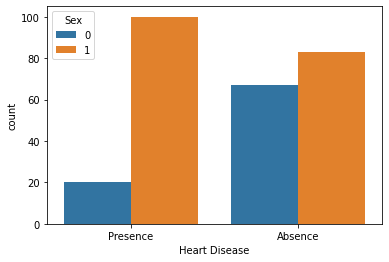

In [5]:
sns.countplot(x=data['Heart Disease'],hue='Sex',data=data)

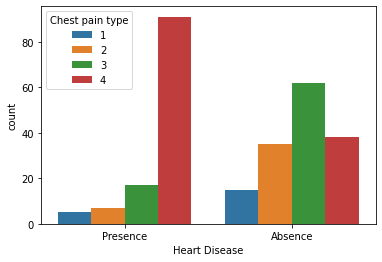

In [6]:
sns.countplot(x=data['Heart Disease'],hue='Chest pain type',data=data)

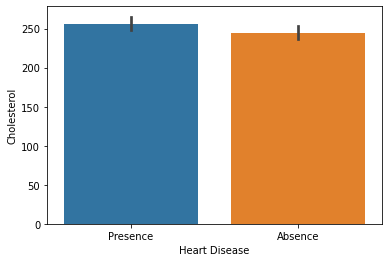

In [7]:
sns.barplot(x=data['Heart Disease'],y=data['Cholesterol'],data=data)

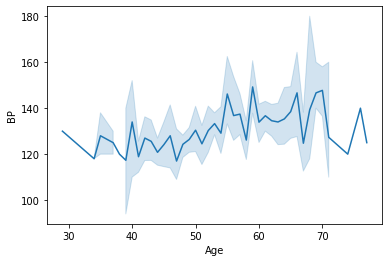

In [8]:
sns.lineplot(x=data['Age'],y=data['BP'],data=data)

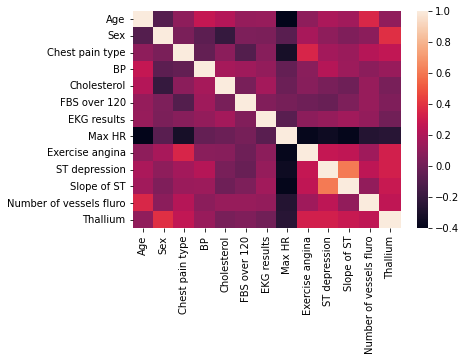

In [9]:
sns.heatmap(data.corr())

In [10]:
le=LabelEncoder()
data['Heart Disease']=le.fit_transform(data['Heart Disease'])

In [11]:
y=data['Heart Disease']
x=data.drop(['Heart Disease'],axis=1)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [13]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
score=accuracy_score(y_test,pred)

In [14]:
score

0.8148148148148148

In [15]:
import pickle
# create an iterator object with write permission - model.pkl
with open('heart_model_pkl', 'wb') as files:
    pickle.dump(rfc, files)